# <center> Work on Indian States !!!</center> 

![title](https://funtechsummercamps.com/blog/wp-content/uploads/2020/04/online-classes.jpg)

In [1]:
#Ignore worning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Handling
import numpy as np
import pandas as pd
from datetime import datetime,timedelta
# Data Visulation Libraries
from matplotlib import pyplot
from pandas.plotting import lag_plot
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

In [3]:
state = pd.read_csv("covid_19_india.csv")

In [4]:
state.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
state.Date

0       30/01/20
1       31/01/20
2       01/02/20
3       02/02/20
4       03/02/20
          ...   
7781    27/10/20
7782    27/10/20
7783    27/10/20
7784    27/10/20
7785    27/10/20
Name: Date, Length: 7786, dtype: object

In [6]:
state.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
state["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***'], dtype=object)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
def get_lavitt_plot(column_name):
    
    df = state[state["State/UnionTerritory"]==column_name]
    df.reset_index(inplace = True) 
    #print(df)
    
    #Conversion method used
    levitts_conversion = []

    #Levitt's Matrix conversion list
    for i in range(len(df)):
        if i == 0:
            current_epi = 1
        else:
            current_epi = (df.Deaths[i] / df.Deaths[i-1])

        levitts_conversion.append(current_epi)
    
    #Add Levitt's Matrix conversion list into dataframe)
    df["levitts_conversion"] = levitts_conversion

    # missing value replace
    df = df.replace(np.nan, 0)
    
    """Make a line of best fit"""

    #Add input : Checking linearity of data
    start_date = 150
    
    x = np.arange(150,len(df["State/UnionTerritory"])).reshape(-1,1)
    y = np.array(levitts_conversion[150:])

    model = LinearRegression().fit(x, y)
    fit_str = "y=%0.6f*x + %1.3f\nR^2=%0.4f" % (model.coef_[0], model.intercept_, model.score(x, y))
    print("y=", model.coef_[0], "*x +", model.intercept_)
    print("R_sq=", model.score(x, y))
    print("y=0 for x=%d" % int((0-model.intercept_)/model.coef_[0]))
    print("y=1 for x=%d" % int((1-model.intercept_)/model.coef_[0]))
    print(fit_str)
    levitt_y_pred = model.predict(x)

    # Plot scatter plot and line
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.scatter(x, y, label="H(t)")
    plt.ylabel("H(t) = X(t)/X(t-1)")
    plt.xlabel("t = days since first Covid death")
    plt.title(column_name, fontsize=20)
    plt.plot(x, levitt_y_pred, marker='x', color='brown', label=fit_str)
    #plt.ylim((0.995,1.05))
    plt.legend()

y= -0.000273740744312438 *x + 1.0780567597243476
R_sq= 0.13150799065397645
y=0 for x=3938
y=1 for x=285
y=-0.000274*x + 1.078
R^2=0.1315


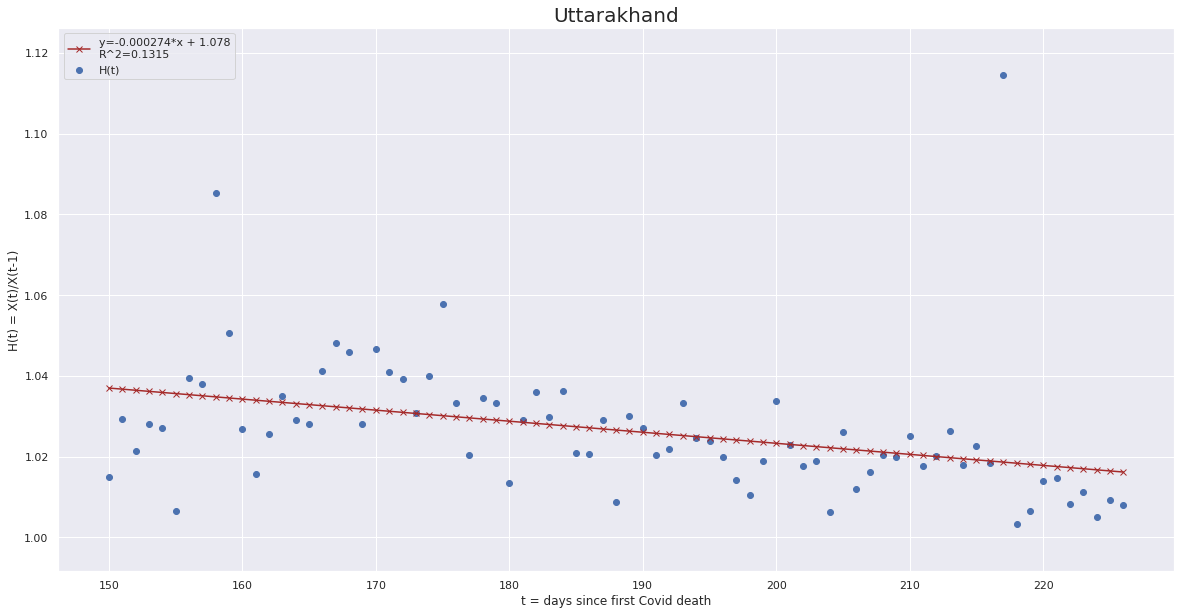

In [10]:
get_lavitt_plot("Uttarakhand")

y= -0.00016950710214918167 *x + 1.0443601719367648
R_sq= 0.7047506025166159
y=0 for x=6161
y=1 for x=261
y=-0.000170*x + 1.044
R^2=0.7048


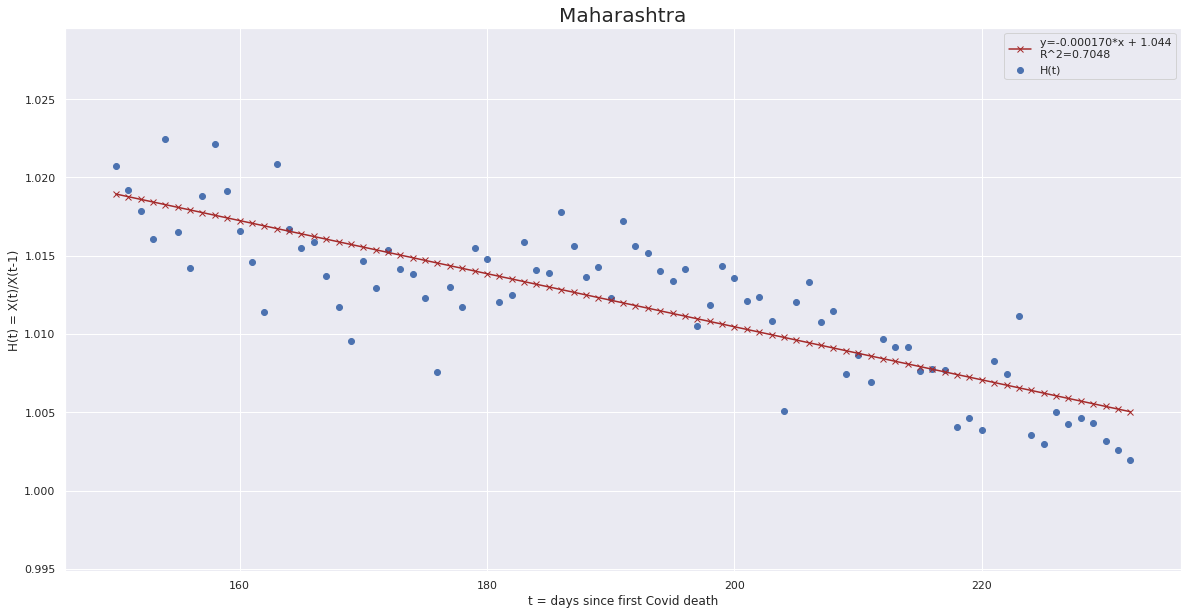

In [11]:
get_lavitt_plot("Maharashtra")

y= -0.0002602106915956069 *x + 1.0615218541051252
R_sq= 0.8622598742836989
y=0 for x=4079
y=1 for x=236
y=-0.000260*x + 1.062
R^2=0.8623


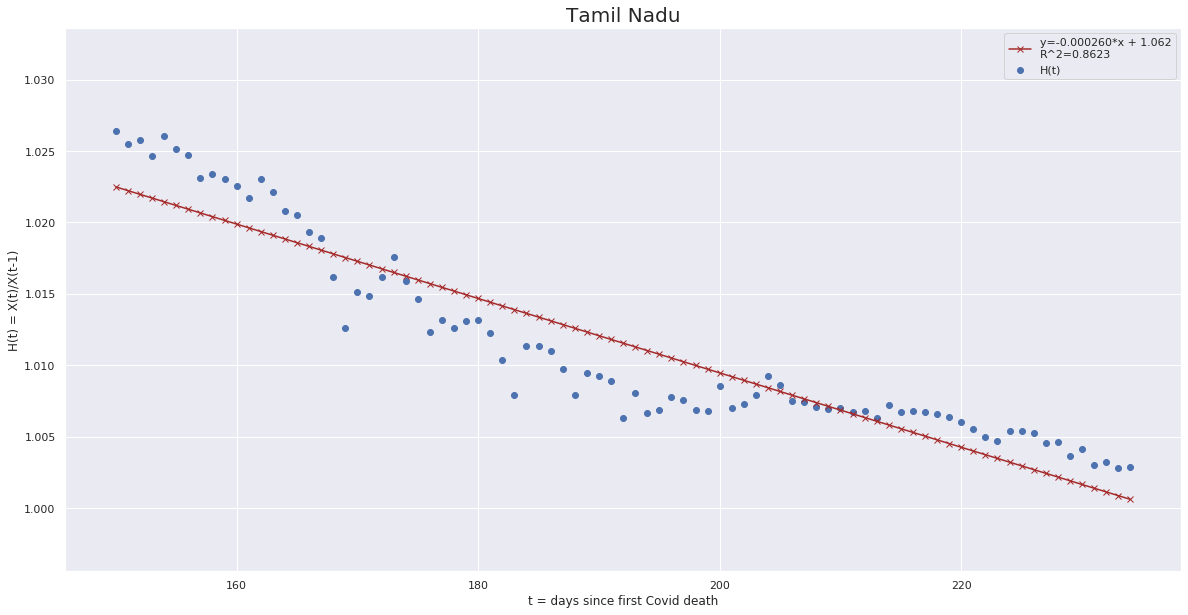

In [12]:
get_lavitt_plot("Tamil Nadu")

### Let's conclude

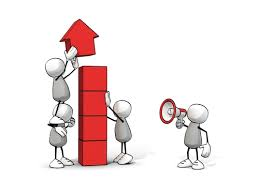